# 6.3 - Geographical Visualizations

## Import Libraries

In [10]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly
import plotly.express as px

In [11]:
# Matplotlib prompt

%matplotlib inline

## Import Data

In [12]:
# Import '.json' file for the US

ny_geo = r'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6/Citibike Project/Data/New York.geo.json'

In [13]:
# Checking the JSON file contents:

f = open(r'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6/Citibike Project/Data/New York.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'kind': 'county', 'name': 'New York', 'state': 'NY'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.9244, 40.8779], [-73.9134, 40.7958], [-73.9627, 40.7355], [-74.0229, 40.6808], [-74.0229, 40.7082], [-73.9846, 40.7958], [-73.9353, 40.8834]]]]}}


In [14]:
# Path

path = 'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6'

In [15]:
# Import citbike_clean

cb_df = pd.read_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_filtered_clean.csv'))

In [16]:
cb_df.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date,start_time,end_date,end_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min,2013-09-09,18:18,2013-09-09,18:35
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min,2013-09-12,18:38,2013-09-12,18:48
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min,2013-09-18,19:44,2013-09-18,19:50
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min,2013-09-28,11:54,2013-09-28,12:03
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,Subscriber,1986.0,2,"-73.9907647, 40.73028666","-73.98379855, 40.72621788",Under 10 min,2013-09-27,22:01,2013-09-27,22:08


In [17]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47912 entries, 0 to 47911
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               47912 non-null  int64  
 1   day_of_week              47912 non-null  object 
 2   start_hour               47912 non-null  int64  
 3   start_station_id         47912 non-null  int64  
 4   start_station_name       47912 non-null  object 
 5   start_station_latitude   47912 non-null  float64
 6   start_station_longitude  47912 non-null  float64
 7   end_station_id           47912 non-null  int64  
 8   end_station_name         47912 non-null  object 
 9   end_station_latitude     47912 non-null  float64
 10  end_station_longitude    47912 non-null  float64
 11  trip_duration            47912 non-null  int64  
 12  subscriber               47912 non-null  object 
 13  birth_year               47912 non-null  float64
 14  gender                

### Check for extreme values

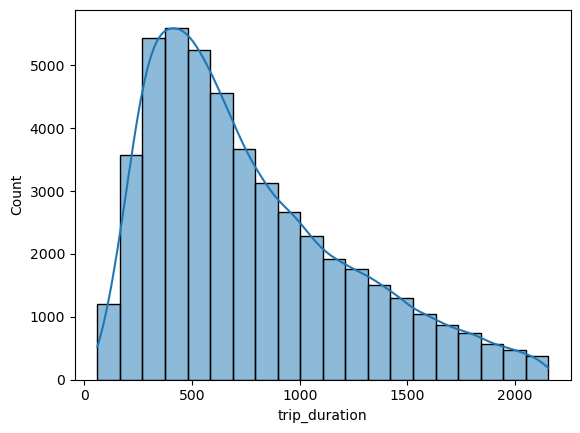

In [18]:
#Created a histogram for extreme values for trip_duration

hist_price = sns.histplot(cb_df['trip_duration'], bins = 20, kde = True)

In [35]:
# Check duplicates

dups = cb_df.duplicated()
dups.shape

(47912,)

In [37]:
# Check for missing values

cb_df.isnull().sum()

Unnamed: 0                 0
day_of_week                0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
start_station_coords       0
end_station_coords         0
trip_length                0
start_date                 0
start_time                 0
end_date                   0
end_time                   0
dtype: int64

## Plotting Choropleth

### Create dataframe with only necessary columns

In [19]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47912 entries, 0 to 47911
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               47912 non-null  int64  
 1   day_of_week              47912 non-null  object 
 2   start_hour               47912 non-null  int64  
 3   start_station_id         47912 non-null  int64  
 4   start_station_name       47912 non-null  object 
 5   start_station_latitude   47912 non-null  float64
 6   start_station_longitude  47912 non-null  float64
 7   end_station_id           47912 non-null  int64  
 8   end_station_name         47912 non-null  object 
 9   end_station_latitude     47912 non-null  float64
 10  end_station_longitude    47912 non-null  float64
 11  trip_duration            47912 non-null  int64  
 12  subscriber               47912 non-null  object 
 13  birth_year               47912 non-null  float64
 14  gender                

In [38]:
# Create columnset

columnset = ['Unnamed: 0',
             'start_station_latitude',
             'start_station_longitude',
             'start_station_coords',
            'end_station_coords',
            'trip_duration',
            'trip_length',
            'day_of_week',]

In [39]:
columnset

['Unnamed: 0',
 'start_station_latitude',
 'start_station_longitude',
 'start_station_coords',
 'end_station_coords',
 'trip_duration',
 'trip_length',
 'day_of_week']

In [40]:
test_1 = cb_df[columnset]

In [41]:
test_1.head()

,Unnamed: 0,start_station_latitude,start_station_longitude,start_station_coords,end_station_coords,trip_duration,trip_length,day_of_week
0,0,40.754666,-73.991382,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",993,10-20 min,Mon
1,1,40.719392,-74.002472,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",581,Under 10 min,Thu
2,2,40.760193,-73.991255,"-73.9912551, 40.76019252","-73.988639, 40.768254",361,Under 10 min,Wed
3,3,40.743156,-73.974347,"-73.97434726, 40.74315566","-73.967416, 40.756014",561,Under 10 min,Sat
4,5,40.730287,-73.990765,"-73.9907647, 40.73028666","-73.98379855, 40.72621788",427,Under 10 min,Fri


In [44]:
# Create data frame to plot

plot1 = test_1[['Unnamed: 0', 'start_station_latitude', 'start_station_longitude', 'trip_length', 'trip_duration']]
plot1.head()

,Unnamed: 0,start_station_latitude,start_station_longitude,trip_length,trip_duration
0,0,40.754666,-73.991382,10-20 min,993
1,1,40.719392,-74.002472,Under 10 min,581
2,2,40.760193,-73.991255,Under 10 min,361
3,3,40.743156,-73.974347,Under 10 min,561
4,5,40.730287,-73.990765,Under 10 min,427


In [47]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40.7, -74], zoom_start = 10)

# Choropleth maps bind Pandas Data Frames and json geometries to allow us a quick visualization of data combination
folium.Choropleth(
    geo_data = ny_geo,
    data = plot1,
    columns = ['Unnamed: 0', 'trip_duration', 'start_station_latitude', 'start_station_longitude'],
    key_on = 'feature.properties.name',
    fill_color = 'Pastel2', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "trip_length").add_to(map)
folium.LayerControl().add_to(map)

map

In [48]:
map.save('plot1.html')